In [1]:
#Import Dependencies
import pandas as pd
import numpy as np

In [2]:
#read the data
df=pd.read_csv(r"E:\Salary_Data.csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
df.shape

(6704, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [5]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


In [6]:
df['Education Level'].value_counts()

Bachelor's Degree    2267
Master's Degree      1573
PhD                  1368
Bachelor's            756
High School           448
Master's              288
phD                     1
Name: Education Level, dtype: int64

In [7]:
df.replace("Bachelor's" , "Bachelor's Degree", inplace=True)
df.replace("Master's", "Master's Degree",inplace=True)
df.replace('phD','PhD',inplace=True)

In [8]:
df['Education Level'].value_counts()

Bachelor's Degree    3023
Master's Degree      1861
PhD                  1369
High School           448
Name: Education Level, dtype: int64

In [9]:
df.duplicated().sum()

4913

In [10]:
df.drop_duplicates(inplace=True)

In [11]:
df.shape

(1791, 6)

In [12]:
df.isnull().sum()

Age                    1
Gender                 1
Education Level        2
Job Title              1
Years of Experience    2
Salary                 4
dtype: int64

In [13]:
df=df.dropna(axis=0, how='any')

In [14]:
df.shape

(1786, 6)

## Check Assumptions

Linear Regression is a Parametric algorithm which means before using Linear Regression we have to check few assumpttions if those assumtions are true then only we can use Linear Regression, other wise use other algorithms.

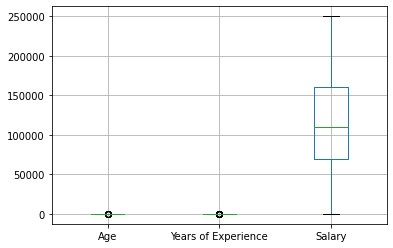

In [15]:
#Assumption 1 : There should be no outliers in the data 
df.boxplot();

**Observation:** Box plot is only applicable if the data in column is continuous. By above graph we can see there are outliers 2 column but we will not eliminate this variable because age and years of experience can have outliers.

In [16]:
df['Gender'].replace(['Female','Male','Other'],[0,1,2],inplace=True)
df['Education Level']=df['Education Level'].map({"Bachelor's Degree":0, 'High School':1, "Master's Degree":2, 'PhD':3})

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1786 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1786 non-null   float64
 1   Gender               1786 non-null   int64  
 2   Education Level      1786 non-null   int64  
 3   Job Title            1786 non-null   object 
 4   Years of Experience  1786 non-null   float64
 5   Salary               1786 non-null   float64
dtypes: float64(3), int64(2), object(1)
memory usage: 97.7+ KB


In [18]:
#categorical to numerical 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Job Title']=le.fit_transform(df['Job Title'])
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,1,0,175,5.0,90000.0
1,28.0,0,2,18,3.0,65000.0
2,45.0,1,3,144,15.0,150000.0
3,36.0,0,0,115,7.0,60000.0
4,52.0,1,2,25,20.0,200000.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1786 entries, 0 to 6631
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1786 non-null   float64
 1   Gender               1786 non-null   int64  
 2   Education Level      1786 non-null   int64  
 3   Job Title            1786 non-null   int32  
 4   Years of Experience  1786 non-null   float64
 5   Salary               1786 non-null   float64
dtypes: float64(3), int32(1), int64(2)
memory usage: 90.7 KB


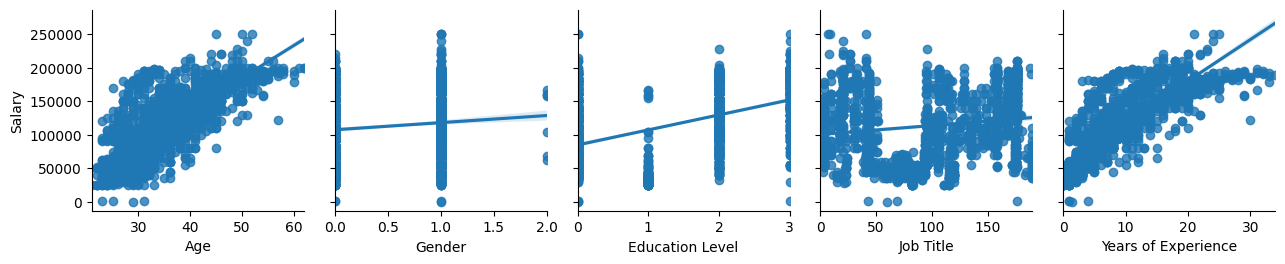

In [20]:
#Assumption 2: Assumption of Linearity:Every independent variable should have a linear relationship with the dependent variable
import seaborn as sns
sns.pairplot(df,x_vars=['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience'],
            y_vars=['Salary'],kind='reg')#kind='reg' will give reg line

**Obseration:** Salary has strong correlation with Age and Year of Experience.

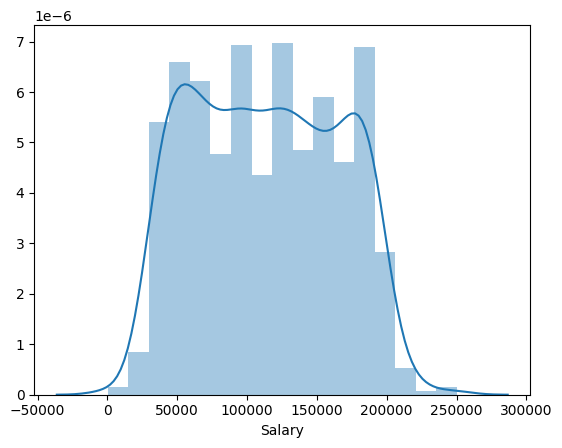

In [21]:
#Assumption of Normality: The dependent variable should follow an approximate normal distribution
sns.distplot(df.Salary);

**Observation:**
Salary variable is not meeting the assumption and we can see the variable is right skewed and not following proper normal Distribution. If its not normal or if its skewed plot then we can transform the column by using log transformation

<AxesSubplot:xlabel='Salary'>

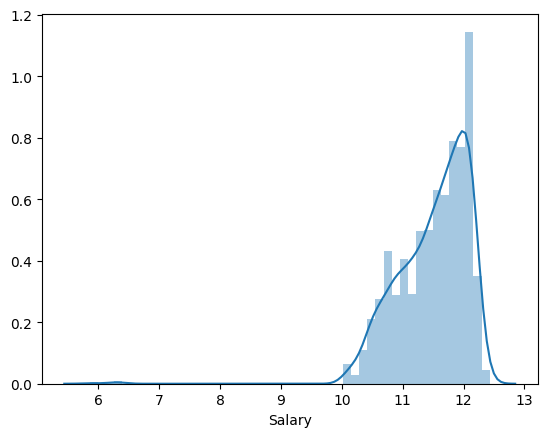

In [22]:
y_log = np.log1p(df.Salary)
sns.distplot(y_log)

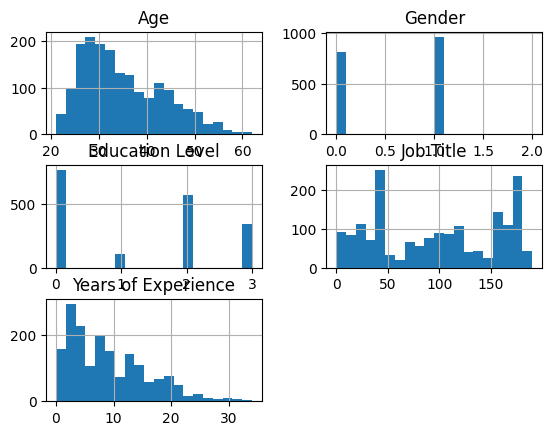

In [23]:
#checking for skewness for x variable
df.iloc[:,0:-1].hist(bins=20);

From above histograms we can clearly see that all the variables are normally distributed but age and years of experience are right skewed.

In [24]:
#checking for skewness of all x variables 
from scipy.stats import skew
#finding the skewness in each variable
df_num_skew = df.iloc[:,0:-1].apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
df_num_skewed = df_num_skew[(df_num_skew > .75) | (df_num_skew < -.75)]
 
print(df_num_skew)
print(df_num_skewed)

# apply log + 1 transformation for all numeric features with skewness over .75
df.iloc[:,0:-1][df_num_skewed.index] = np.log1p(df.iloc[:,0:-1][df_num_skewed.index])

Age                    0.668205
Gender                -0.104648
Education Level        0.133093
Job Title              0.006280
Years of Experience    0.896610
dtype: float64
Years of Experience    0.89661
dtype: float64


                          Age    Gender  Education Level  Job Title  \
Age                  1.000000  0.066990         0.458825   0.241655   
Gender               0.066990  1.000000        -0.011111   0.029242   
Education Level      0.458825 -0.011111         1.000000   0.112089   
Job Title            0.241655  0.029242         0.112089   1.000000   
Years of Experience  0.936263  0.072623         0.457789   0.222099   

                     Years of Experience  
Age                             0.936263  
Gender                          0.072623  
Education Level                 0.457789  
Job Title                       0.222099  
Years of Experience             1.000000  


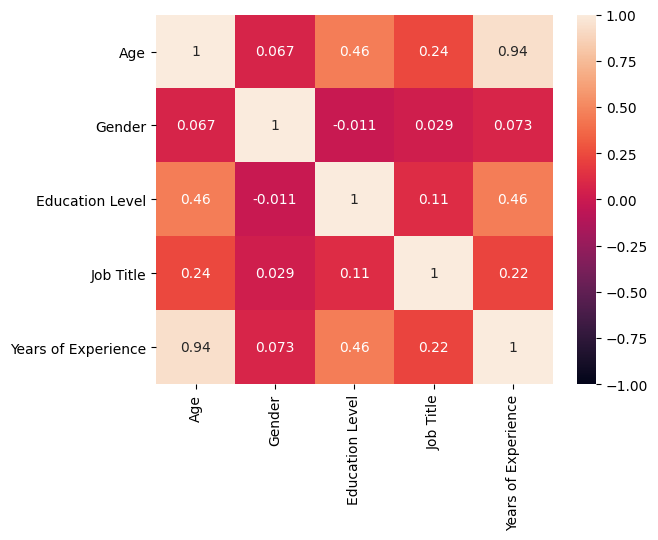

In [25]:
#Assumption of no multicollinearity: There should be no multicollinearity where we are checking the relationship between the independent variables
# multicollinearity is the relationship amongst the multiple independent variables
import matplotlib.pyplot as plt
corr_df=df.iloc[:,0:-1].corr(method="pearson")
print(corr_df)
 
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

**Observation:** We want value close to 0 which means their is no correlated with each other. From above heatmap we can say that all the variables are moderate correlated with each other so here we can go ahead with all this variable since there is no variable with high corelation and all variables are in acceptable range.



In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = df.iloc[:,0:-1].columns
vif_df["VIF Factor"] = [vif(df.iloc[:,0:-1].values, i) for i in range(df.iloc[:,0:-1].shape[1])]
vif_df.round(2)

,features,VIF Factor
0,Age,11.93
1,Gender,2.17
2,Education Level,2.71
3,Job Title,3.84
4,Years of Experience,6.20


**Observation:** VIF value should be less than 5 which is good that represent no multicolinearity. since age and years of experience is the importand variable in the data will not eliminate those variables

In [27]:
# rename columns
df = df.rename(columns={'Age':'age', 'Gender':'gender','Education Level':'education_level', 'Job Title':'job_title', 'Years of Experience':'experience', 'Salary':'salary'})
df.head()

,age,gender,education_level,job_title,experience,salary
0,32.0,1,0,175,5.0,90000.0
1,28.0,0,2,18,3.0,65000.0
2,45.0,1,3,144,15.0,150000.0
3,36.0,0,0,115,7.0,60000.0
4,52.0,1,2,25,20.0,200000.0


In [28]:
x=df.loc[:,['age','gender','education_level', 'job_title', 'experience']]
y=df.salary
y=y.astype(int)

In [29]:
#splitting the data into training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.3, random_state=10)

In [30]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1250, 5)
(1250,)
(536, 5)
(536,)


In [31]:
new_df=x_test.copy()
new_df

,age,gender,education_level,job_title,experience
247,31.0,1,0,68,3.0
1661,32.0,1,0,43,6.0
3132,41.0,1,3,176,16.0
2267,26.0,1,0,174,2.0
3439,30.0,1,1,70,1.0
...,...,...,...,...,...
4528,28.0,1,1,92,2.0
2399,35.0,0,2,44,10.0
6276,39.0,1,3,96,10.0
3115,33.0,0,2,43,9.0


In [32]:
#scalling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x = scaler.fit_transform(x)      

## Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

# train the model object
lm.fit(x_train, y_train)  

LinearRegression()

In [34]:
y_pred=lm.predict(x_test)
#print(y_pred) 

from sklearn.metrics import r2_score,mean_squared_error
print("R-squared:", r2_score(y_test,y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Adj R-square:", 1 - (1-r2_score(y_test,y_pred))*(len(y)-1)/(len(y)-x.shape[1]-1))

R-squared: 0.6955529610277507
RMSE: 28327.105506965152
Adj R-square: 0.6946977727160308


## Ridge Regression

In [35]:
from sklearn.linear_model import Ridge

rid = Ridge()

rid.fit(x_train, y_train)  

Ridge()

In [36]:
y_pred = rid.predict(x_test)
#print(y_pred)

print("R-squared:", r2_score(y_test,y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Adj R-square:", 1 - (1-r2_score(y_test,y_pred))*(len(y)-1)/(len(y)-x.shape[1]-1))

R-squared: 0.6955447575177555
RMSE: 28327.487149907967
Adj R-square: 0.6946895461624683


## Lasso Regression

In [37]:
from sklearn.linear_model import Lasso

las = Lasso()

las.fit(x_train, y_train)  

Lasso()

In [38]:
y_pred = las.predict(x_test)

print("R-squared:", r2_score(y_test,y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Adj R-square:", 1 - (1-r2_score(y_test,y_pred))*(len(y)-1)/(len(y)-x.shape[1]-1))

R-squared: 0.6955513187769619
RMSE: 28327.181908018003
Adj R-square: 0.694696125852178


## Decision Tree

In [39]:
from sklearn.tree import DecisionTreeRegressor

model_DT = DecisionTreeRegressor(random_state=10, criterion='mse') 

#fit the model on the data and predict the values
model_DT.fit(x_train, y_train)

E:\Anaconda\lib\site-packages\sklearn\tree\_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


DecisionTreeRegressor(criterion='mse', random_state=10)

In [40]:
#predicting the model
y_pred = model_DT.predict(x_test)
#print(list(zip(y_test,y_pred)))

print("R-squared:", r2_score(y_test,y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Adj R-square:", 1 - (1-r2_score(y_test,y_pred))*(len(y)-1)/(len(y)-x.shape[1]-1))

R-squared: 0.7926468848497787
RMSE: 23377.690520689393
Adj R-square: 0.792064432279132


## Tunned Decision Tree

In [41]:
from sklearn.tree import DecisionTreeRegressor

model_DT=DecisionTreeRegressor(max_depth=12,min_samples_leaf=4,random_state=10)
model_DT.fit(x_train,y_train)
#fit the model on the data and predict the values
y_pred=model_DT.predict(x_test)
#print(y_pred)

print("R-squared:", r2_score(y_test,y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Adj R-square:", 1 - (1-r2_score(y_test,y_pred))*(len(y)-1)/(len(y)-x.shape[1]-1))

R-squared: 0.8001328575378661
RMSE: 22951.81446403833
Adj R-square: 0.7995714329803882


## KNN

In [42]:
#predicting using the KNeighbors_Regressor
from sklearn.neighbors import KNeighborsRegressor
model_KNN=KNeighborsRegressor(n_neighbors=int(np.sqrt(len(y_train))), metric='euclidean')
#fit the model on the data and predict the values
model_KNN.fit(x_train,y_train)
y_pred=model_KNN.predict(x_test)

#KNN is ideally suitable for less number of observation

print("R-squared:", r2_score(y_test,y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Adj R-square:", 1 - (1-r2_score(y_test,y_pred))*(len(y)-1)/(len(y)-x.shape[1]-1))

R-squared: 0.7838140288470182
RMSE: 23870.420903215312
Adj R-square: 0.7832067648831054


## SVM

In [43]:
#predicting using the KNeighbors_Regressor
from sklearn.svm import SVR
model_SVR=SVR(kernel="rbf",gamma=0.1,C=1)
#fit the model on the data and predict the values
model_SVR.fit(x_train,y_train)
y_pred=model_SVR.predict(x_test)

print("R-squared:", r2_score(y_test,y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Adj R-square:", 1 - (1-r2_score(y_test,y_pred))*(len(y)-1)/(len(y)-x.shape[1]-1))

R-squared: -0.004160848068375689
RMSE: 51445.56782403634
Adj R-square: -0.0069815246078936966


## Random Forest

In [44]:
#predicting using the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

model_RF=RandomForestRegressor(n_estimators=100,random_state=10)

model_RF.fit(x_train,y_train)

RandomForestRegressor(random_state=10)

In [46]:
y_pred=model_RF.predict(x_test)
#print(y_pred)

from sklearn.metrics import r2_score,mean_squared_error

print("R-squared:", r2_score(y_test,y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Adj R-square:", 1 - (1-r2_score(y_test,y_pred))*(len(y)-1)/(len(y)-x.shape[1]-1))

R-squared: 0.8555659739349835
RMSE: 19511.06975158833
Adj R-square: 0.855160260378621


In [47]:
print(y_test.min())
print(y_test.max())

350
250000


In [48]:
model_RF.score(x_train, y_train)

0.9783472025437538

In [49]:
print(list(zip(df.columns[1:],model_RF.feature_importances_)))

[('gender', 0.07807491700444862), ('education_level', 0.008639817854772828), ('job_title', 0.024251773577535645), ('experience', 0.12376992042599737), ('salary', 0.7652635711372455)]


**Observation:** From above zip list result we can notice that all variable are used while building Random forest where salary, years of experience and gender are most used where as education level and job title are less used.

In [50]:
new_df["actual salary"]=y
new_df["predicted salary"]=y_pred
new_df

,age,gender,education_level,job_title,experience,actual salary,predicted salary
247,31.0,1,0,68,3.0,50000,50650.000000
1661,32.0,1,0,43,6.0,110000,108773.733333
3132,41.0,1,3,176,16.0,151310,168803.673333
2267,26.0,1,0,174,2.0,60000,57911.333333
3439,30.0,1,1,70,1.0,32000,31443.333333
...,...,...,...,...,...,...,...
4528,28.0,1,1,92,2.0,43000,42878.333333
2399,35.0,0,2,44,10.0,152039,139990.765833
6276,39.0,1,3,96,10.0,100000,105489.106667
3115,33.0,0,2,43,9.0,121120,121996.076667


In [51]:
new_df=new_df.reset_index().drop('index',axis=1) 
new_df

,age,gender,education_level,job_title,experience,actual salary,predicted salary
0,31.0,1,0,68,3.0,50000,50650.000000
1,32.0,1,0,43,6.0,110000,108773.733333
2,41.0,1,3,176,16.0,151310,168803.673333
3,26.0,1,0,174,2.0,60000,57911.333333
4,30.0,1,1,70,1.0,32000,31443.333333
...,...,...,...,...,...,...,...
531,28.0,1,1,92,2.0,43000,42878.333333
532,35.0,0,2,44,10.0,152039,139990.765833
533,39.0,1,3,96,10.0,100000,105489.106667
534,33.0,0,2,43,9.0,121120,121996.076667


## Tunned Random Forest

In [52]:
#predicting using the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

model_tunned_RF=RandomForestRegressor(n_estimators=300,random_state=10,
                                        max_depth=12,min_samples_leaf=4)
model_tunned_RF.fit(x_train,y_train)
#fit the model on the data and predict the values
y_pred=model_tunned_RF.predict(x_test)
#print(y_pred)

print("R-squared:", r2_score(y_test,y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Adj R-square:", 1 - (1-r2_score(y_test,y_pred))*(len(y)-1)/(len(y)-x.shape[1]-1))

R-squared: 0.8503249802880343
RMSE: 19861.90886755423
Adj R-square: 0.8499045448394051


**Observation:** 

1. R-square value tells you how much variablity you can explain in the data with the help of regression equation. You will get value in the range of 0 to 1 so close to 1 means good model and close to 0 means worst model. In our case r2 value is not close to 1, r2 and adjusted r2 value must be almost similar, and RMSE value must be lower as possible 

2. From above models, Base Random Forest model has showned highest accuracy score then other models so I select Random Forest as the best model. Also overall score for random forest on train data is 91% and model accuracy is 87% and RMSE value is 50 which is lower i.e close to min= 4. With this I conclude that the linear regression model needs tunning.

## Predicting for single person by creating a function for user input

In [53]:
def ask_user():
    
    user_data = []
    
    a = float(input("Enter your Age:"))
    user_data.append(a)
    
    a = float(input("Enter your Highest Qualification:\n 0 -> Bachelor's Degree | 1 -> High School | 2 -> Master's Degree | 3 -> PhD "))
    user_data.append(a)
    
    a = float(input("Years of Experience : "))
    user_data.append(a)
    
    a = float(input("Enter your Gender :\n 0 -> Female | 1 -> Male | 2 -> Other "))
    user_data.append(a)
    
    options = ['Account Manager','Accountant','Administrative Assistant',
                'Back end Developer','Business Analyst','Business Development Manager',
               'Business Intelligence Analyst','CEO','Chief Data Officer','Chief Technology Officer','Content Marketing Manager',
             'Copywriter','Creative Director','Customer Service Manager','Customer Service Rep','Customer Service Representative',
             'Customer Success Manager', 'Customer Success Rep', 'Data Analyst', 'Data Entry Clerk', 'Data Scientist', 'Delivery Driver', 'Developer', 'Digital Content Producer',
             'Digital Marketing Manager', 'Digital Marketing Specialist', 'Director', 'Director of Business Development', 'Director of Data Science', 'Director of Engineering', 'Director of Finance', 'Director of HR', 'Director of Human Capital',
             'Director of Human Resources', 'Director of Marketing', 'Director of Operations', 'Director of Product Management', 'Director of Sales', 'Director of Sales and Marketing', 'Event Coordinator', 'Financial Advisor', 'Financial Analyst', 'Financial Manager',
             'Front End Developer', 'Front end Developer', 'Full Stack Engineer', 'Graphic Designer', 'HR Generalist', 'HR Manager', 'Help Desk Analyst', 'Human Resources Coordinator',
             'Human Resources Director', 'Human Resources Manager', 'IT Manager', 'IT Support', 'IT Support Specialist', 'Junior Account Manager', 'Junior Accountant', 'Junior Advertising Coordinator',
             'Junior Business Analyst', 'Junior Business Development Associate', 'Junior Business Operations Analyst', 'Junior Copywriter', 'Junior Customer Support Specialist', 'Junior Data Analyst', 'Junior Data Scientist', 'Junior Designer',
             'Junior Developer', 'Junior Financial Advisor', 'Junior Financial Analyst', 'Junior HR Coordinator', 'Junior HR Generalist', 'Junior Marketing Analyst', 'Junior Marketing Coordinator', 'Junior Marketing Manager', 'Junior Marketing Specialist',
               'Junior Operations Analyst', 'Junior Operations Coordinator', 'Junior Operations Manager', 'Junior Product Manager',
             'Junior Project Manager', 'Junior Recruiter', 'Junior Research Scientist', 'Junior Sales Associate', 'Junior Sales Representative', 'Junior Social Media Manager',
             'Junior Social Media Specialist', 'Junior Software Developer', 'Junior Software Engineer', 'Junior UX Designer', 'Junior Web Designer', 'Junior Web Developer',
             'Juniour HR Coordinator', 'Juniour HR Generalist', 'Marketing Analyst', 'Marketing Coordinator', 'Marketing Director', 'Marketing Manager', 'Marketing Specialist', 'Network Engineer',
             'Office Manager', 'Operations Analyst', 'Operations Director', 'Operations Manager', 'Principal Engineer', 'Principal Scientist', 'Product Designer',
             'Product Manager', 'Product Marketing Manager', 'Project Engineer', 'Project Manager', 'Public Relations Manager', 'Receptionist', 'Recruiter',
             'Research Director', 'Research Scientist', 'Sales Associate', 'Sales Director', 'Sales Executive', 'Sales Manager', 'Sales Operations Manager',
             'Sales Representative', 'Senior Account Executive', 'Senior Account Manager', 'Senior Accountant', 'Senior Business Analyst', 'Senior Business Development Manager', 'Senior Consultant',
             'Senior Data Analyst', 'Senior Data Engineer', 'Senior Data Scientist', 'Senior Engineer', 'Senior Financial Advisor', 'Senior Financial Analyst', 'Senior Financial Manager',
             'Senior Graphic Designer', 'Senior HR Generalist', 'Senior HR Manager', 'Senior HR Specialist', 'Senior Human Resources Coordinator', 'Senior Human Resources Manager', 'Senior Human Resources Specialist',
             'Senior IT Consultant', 'Senior IT Project Manager', 'Senior IT Support Specialist', 'Senior Manager', 'Senior Marketing Analyst', 'Senior Marketing Coordinator',
             'Senior Marketing Director', 'Senior Marketing Manager', 'Senior Marketing Specialist', 'Senior Operations Analyst', 'Senior Operations Coordinator', 'Senior Operations Manager', 'Senior Product Designer',
             'Senior Product Development Manager', 'Senior Product Manager', 'Senior Product Marketing Manager', 'Senior Project Coordinator', 'Senior Project Engineer', 'Senior Project Manager', 'Senior Quality Assurance Analyst', 
               'Senior Research Scientist', 'Senior Researcher', 'Senior Sales Manager', 'Senior Sales Representative', 'Senior Scientist', 'Senior Software Architect', 'Senior Software Developer',
             'Senior Software Engineer', 'Senior Training Specialist', 'Senior UX Designer', 'Social M', 'Social Media Man', 'Social Media Manager', 'Social Media Specialist',
             'Software Developer', 'Software Engineer', 'Software Engineer Manager', 'Software Manager', 'Software Project Manager', 'Strategy Consultant', 'Supply Chain Analyst',
             'Supply Chain Manager', 'Technical Recruiter', 'Technical Support Specialist', 'Technical Writer', 'Training Specialist', 'UX Designer', 'UX Researcher', 'VP of Finance', 'VP of Operations', 'Web Developer']
    a  = "Pick an option:\n"
    for index, item in enumerate(options):
        a += f'{index} -> {item}\n'
    a += 'Enter the number of your Job Role from above list: '
    a = float(input(a))
    user_data.append(a)

    return user_data

In [54]:
user_info = ask_user()
user_info

pred_sal=model_RF.predict(np.array(user_info).reshape(1,5))
print('Yours predicted salary is',pred_sal)

Enter your Age:21
Enter your Highest Qualification:
 0 -> Bachelor's Degree | 1 -> High School | 2 -> Master's Degree | 3 -> PhD 2
Years of Experience : 0
Enter your Gender :
 0 -> Female | 1 -> Male | 2 -> Other 0
Pick an option:
0 -> Account Manager
1 -> Accountant
2 -> Administrative Assistant
3 -> Back end Developer
4 -> Business Analyst
5 -> Business Development Manager
6 -> Business Intelligence Analyst
7 -> CEO
8 -> Chief Data Officer
9 -> Chief Technology Officer
10 -> Content Marketing Manager
11 -> Copywriter
12 -> Creative Director
13 -> Customer Service Manager
14 -> Customer Service Rep
15 -> Customer Service Representative
16 -> Customer Success Manager
17 -> Customer Success Rep
18 -> Data Analyst
19 -> Data Entry Clerk
20 -> Data Scientist
21 -> Delivery Driver
22 -> Developer
23 -> Digital Content Producer
24 -> Digital Marketing Manager
25 -> Digital Marketing Specialist
26 -> Director
27 -> Director of Business Development
28 -> Director of Data Science
29 -> Directo

E:\Anaconda\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
